In [96]:
# Handling ROOT files
import os, sys
import numpy as np
import uproot
from uproot_methods import TLorentzVectorArray as tlva
import pandas as pd
from data import GetData
# Plotting
import matplotlib
from matplottery import Hist1D,Hist2D, plot_stack
%matplotlib inline
import matplotlib.pyplot as plt
# Machine Learning
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
import xgboost as xgb #BDT
import ast
import json

pd.set_option('display.max_rows', 20)


In [97]:
# Manualy set signal name
signal = "WH_HtoRhoGammaPhiGamma"

In [98]:
# Get data
dataframes = GetData("output")

NameError: global name 'os' is not defined

In [61]:
# Print loaded dataframe names
toPrint=dataframes.keys()
toPrint[toPrint.index(signal)]+=" <-- Signal"
print("Loaded Dataframes:\n    "+"\n    ".join(toPrint))

Loaded Dataframes:
    TTJets_SingleLeptFromT
    TTGamma_SingleLeptFromTbar
    WGToLNuG
    TTJets_SingleLeptFromTbar
    WJetsToLNu
    WH_HtoRhoGammaPhiGamma <-- Signal
    TTGamma_SingleLeptFromT


In [75]:
# Set colors
colors = {}
rgbs=[[0.4, 0.4, 0.4], [1.0, 0.4, 1.0], [0.4, 0.0, 0.8],
      [0.4, 0.6, 1.0], [0.4, 0.8, 0.4], [0.9, 0.9, 0.9],
      [0.4, 0.4, 0.6], [0.0, 0.4, 0.0]
     ]
for i, name in enumerate(dataframes.keys()):
    color = [1.0,0.0,0.0] if name == signal else rgbs[i]
    colors[name] = color

In [73]:
# Mass stack plot
bgsPhiPlots_mass = []
sigsPhiPlots_mass = []
for name, df in dataframes.iteritems():
    # Get mass distribution
    thisPhi_mass = df.loc[df.recoPhi_mass != -999, "recoPhi_mass"].to_numpy()
    # Get scale1fb
    thisWeight = df.loc[(df.scale1fb != -999) & (df.recoPhi_mass != -999), "scale1fb"].to_numpy()
    # Manually set signal scalef1b
    if name == signal and np.array_equal(thisWeight, np.ones_like(thisWeight)):
        thisWeight = 0.0*thisWeight+0.1
    # Plot mass distribution
    thisPhiPlot_mass = Hist1D(thisPhi_mass,label=name.split("_")[0], bins=np.linspace(0,2,100), weights=thisWeight, color=colors[name])
    # Add plot to stack
    if name == signal:
        sigsPhiPlots_mass.append(thisPhiPlot_mass)
    else:
        bgsPhiPlots_mass.append(thisPhiPlot_mass)

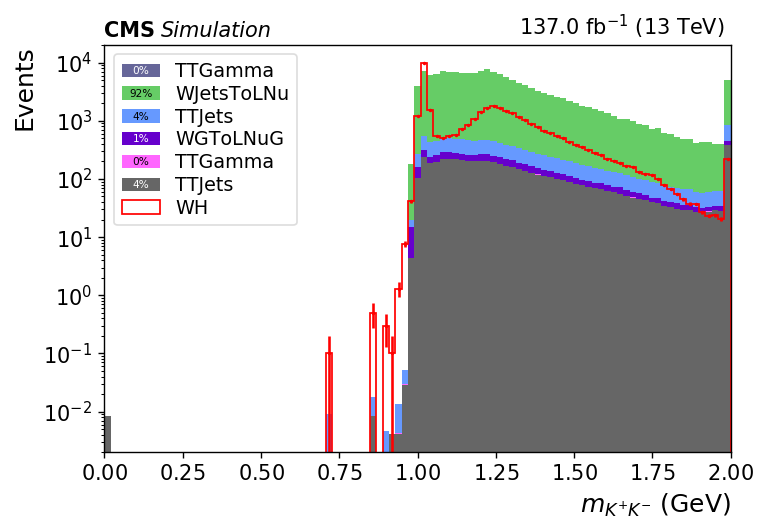

In [74]:
plot_stack(bgs=bgsPhiPlots_mass, sigs=sigsPhiPlots_mass, do_log=True,
           xlabel=r"$m_{K^{+}K^{-}}$ (GeV)", ylabel="Events",cms_type="Simulation",
           lumi="137.0");